# Background Information


---


*Created by Lucy Gao, Rupa Kurinchi-Vendhan, and Eileen Li* 


---


\\
Our project is called ForestFireNet. It is a machine learning model utilizing Random Forest Regressors and Neural Networks to separately predict confidence of a forest fire occurring given information such as latitude, longitude, brightness, and time of day. Due to climate warming, wildfires are unfortunately an extremely pressing problem in our current day and age. In 2019-2020, the Australia Bushfires made headlines all over the world as hundreds of devastating wildfires swept across the country, labeled a megafire that ravaged infrastructure and took many human and animal lives. While there are many ways to predict whether or not a forest fire will occur in a given area, machine learning can take into account numerous different factors and predict with high accuracy, proving itself to be a strong contender for solving this problem. Our target audience for this model is anyone from researchers to the general public, who may want to predict the confidence of a forest fire occurring to take precautions or purely out of casual curiosity. The dataset our model is trained on is from Australia's fire intensity records and is examined in greater detail below.

In [ ]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Data



# Data Exploration

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/RupaKurinchiVendhan/ForestFires/main/fire_archive.csv')
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [ ]:
data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,2019-09-30,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,1.0,2019-09-30,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,1.0,2019-09-30,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,1.0,2019-09-30,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0


We have 36011 rows and 15 columns in our dataset.

In [ ]:
data.shape

(36011, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


We don't have any null values in our dataset, the counts for each column are consistent with each other. This means we do not have any holes in our data.

In [ ]:
data.nunique()

latitude      30310
longitude     31127
brightness     1182
scan             39
track            11
acq_date         61
acq_time        662
satellite         2
instrument        1
confidence      101
version           1
bright_t31      590
frp            2976
daynight          2
type              3
dtype: int64

We can learn more about our dataset by looking at the statistics for each of the fields.

In [ ]:
data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


We can analyze how our the various features in our dataset relate to each other.

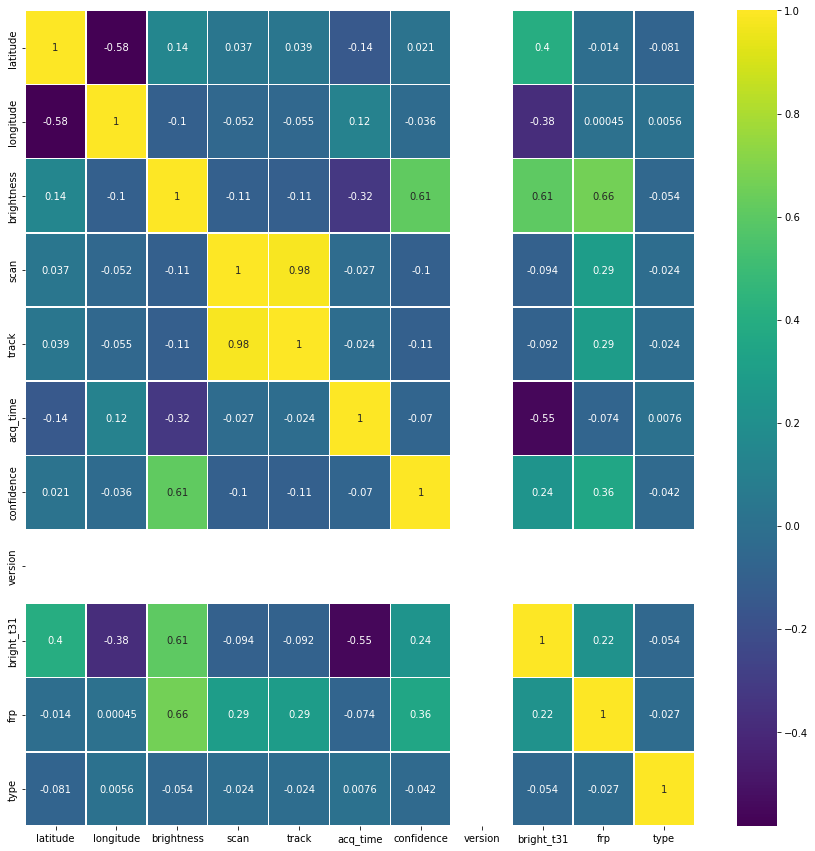

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

## Data Processing

Because the 'instrument' and 'version' columns have only one value, we can remove them from our feature list.

In [ ]:
data = data.drop(['instrument'], axis = 1)
data = data.drop(['version'], axis = 1)

We see that brightness is the best indicator of confidence. We also see that scan and track have similar effects, so we remove it from our dataset.

In [ ]:
data = data.drop(['track'], axis = 1)

To account for the various values in the 'daynight' and 'satellite' columns, we will create separate columns for each category.

In [ ]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

data['daynight'] = data['daynight'].map(daynight_map)
data['satellite'] = data['satellite'].map(satellite_map)

data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0


In [ ]:
data['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

Since 'type' has little variation in its values, we can consolidate its data.

In [ ]:
types = pd.get_dummies(data['type'])
data = pd.concat([data, types], axis=1)

data = data.drop(['type'], axis = 1)
data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0


In [ ]:
data = data.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

We will make the 'scan' column categorical using the binning method.

In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
data['scan_binned'] = pd.cut(data['scan'], bins=bins, labels=labels)

data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4


In [ ]:
data['acq_date'] = pd.to_datetime(data['acq_date'])
data['year'] = data['acq_date'].dt.year
data['month'] = data['acq_date'].dt.month
data['day'] = data['acq_date'].dt.day

In [ ]:
y = data['confidence']
fin = data.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

In [ ]:
fin.head()

,latitude,longitude,brightness,scan,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1.0,1,6.6,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,1.0,1,11.3,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,3.1,1,23.1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,1.1,1,6.5,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,4.0,1,27.6,1,0,0,4,2019,8,1


## Visualizing the Data

Let's first visualize the data by examining the longitude and latitude of different datapoints. We plot each point based on their coordinates and then assign each point a color representing confidence of a forest fire occuring. Yellow corresponds with highest confidence and red lowest confidence.

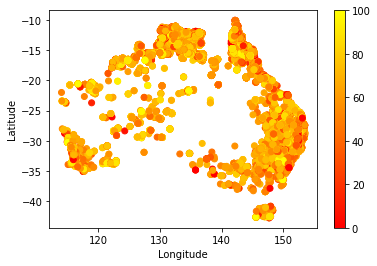

In [ ]:
lon = data['longitude']
lat = data['latitude']
plt.scatter(lon, lat, c=y, cmap='autumn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

We can also examine the confidences of a forest fire occurring in this dataset. Based on the graph, we conclude that there are more datapoints with higher confidence compared to lower confidence.

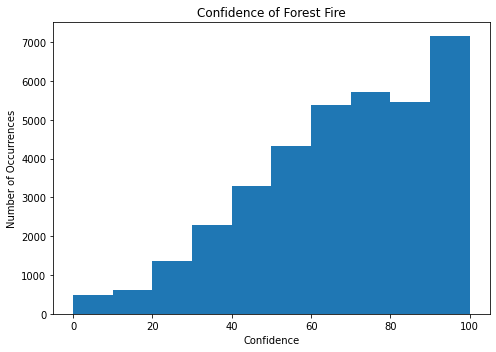

In [ ]:
fig, axs = plt.subplots(1, 1, figsize =(7, 5), tight_layout = True)
plt.hist(np.array(data['confidence']))
plt.xlabel("Confidence")
plt.ylabel("Number of Occurrences")
plt.title("Confidence of Forest Fire Occurrences")
plt.show() 

We can check some features we predict to relate to confidence, such as latitude, longitude, and brightness, and plot them. 

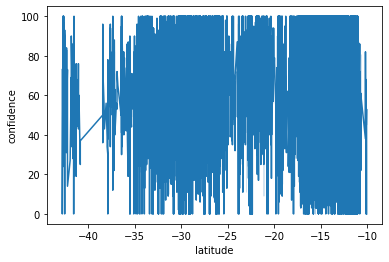

In [ ]:
sns.lineplot(x=data['latitude'], y=data['confidence'])

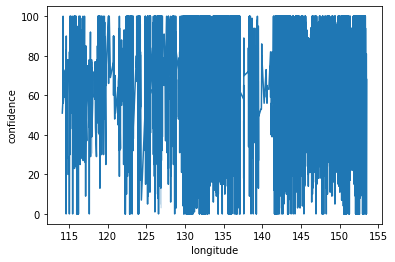

In [ ]:
sns.lineplot(x=data['longitude'], y=data['confidence'])

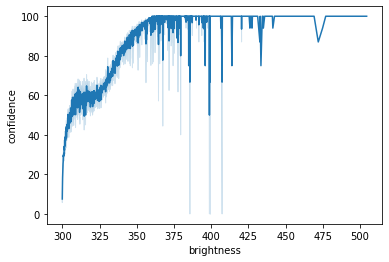

In [ ]:
sns.lineplot(x=data['brightness'], y=data['confidence'])

Next, we can examine the relation between confidence and time. We note that the breaks in data around 700-1000 and 1800-2400 in 'acq_time' are probably due to seasonal reasons-- the researchers most likely did not collect data during times where forest fires were very unlikely to occur, such as during months when precipitation was more common.

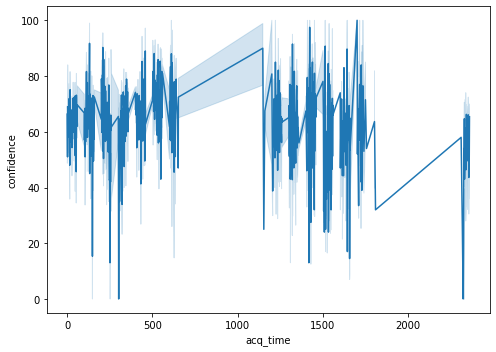

In [ ]:
fig, axs = plt.subplots(1, 1, figsize =(7, 5), tight_layout = True)
sns.lineplot(x=data['acq_time'], y=data['confidence'])

## Training and Testing Data

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

# Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [ ]:
# Fit
rf.fit(Xtrain, ytrain)

y_pred = rf.predict(Xtest)

# Checking the accuracy on the training data
train_accuracy = round(rf.score(Xtrain, ytrain)*100,2)
print(round(train_accuracy, 2), '%')

95.39 %


In [ ]:
# Checking the accuracy on the testing data
test_accuracy = round(rf.score(Xtest, ytest)*100,2)
print(round(test_accuracy, 2), '%')

67.34 %


We can use RandomizedSearchCV to perform hyperparameter tuning on our Random Forest Regressor.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }

for param in random_grid:
  print(param, random_grid[param])

n_estimators [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500]
max_features ['auto', 'sqrt']
max_depth [15, 18, 21, 25, 28, 31, 35, None]
min_samples_split [2, 3, 5]
min_samples_leaf [1, 2, 4]


We perform a randomized search of parameters, using 3-fold cross validation. We will analyze all 100 different combinations and identify the best parameters.

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  33.5s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  29.8s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  29.7s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  37.7s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  37.3s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  37.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  13.7s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 478}

In [ ]:
rf_tuned = RandomForestRegressor(max_depth=35,
                                 max_features='sqrt',
                                 min_samples_leaf=1,
                                 min_samples_split=3,
                                 n_estimators=478).fit(Xtrain, ytrain)

In [ ]:
y_pred = rf_tuned.predict(Xtest)

# Checking the accuracy on the training data
train_accuracy = round(rf_tuned.score(Xtrain, ytrain)*100,2)
print(round(train_accuracy, 2), '%')

94.16 %


In [ ]:
# Checking the accuracy on the testing data
test_accuracy = round(rf_tuned.score(Xtest, ytest)*100,2)
print(round(test_accuracy, 2), '%')

67.76 %


Let's check our error visually. First, we can plot the error for each datapoint in our training dataset.

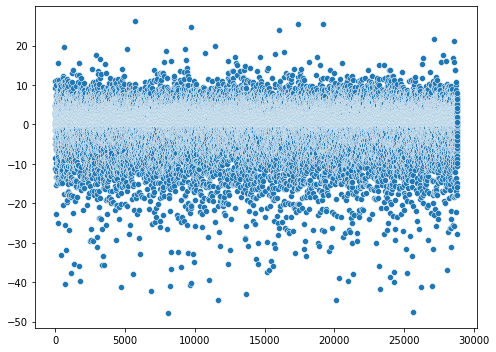

In [ ]:
# plot error for Xtrain
predict = rf_tuned.predict(Xtrain)
fig, axs = plt.subplots(1, 1, figsize =(7, 5), tight_layout = True)
sns.scatterplot(x=np.arange(len(Xtrain)), y=(np.array(ytrain)-predict))

Next, we plot the error for each datapoint in our testing dataset.

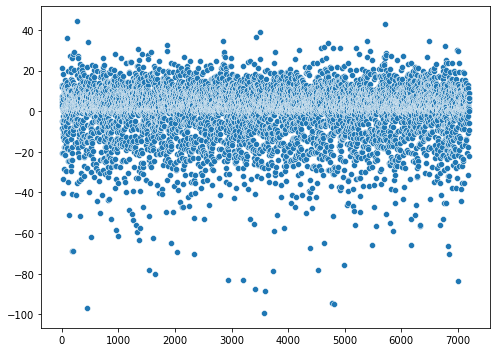

In [ ]:
# plot error for Xtest
fig, axs = plt.subplots(1, 1, figsize =(7, 5), tight_layout = True)
sns.scatterplot(x=np.arange(len(Xtest)), y=(np.array(ytest)-y_pred))

We can also analyze our errors on a heatmap based on each point's latitude and longitude.

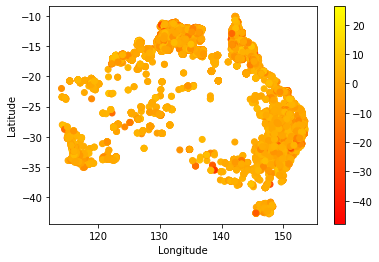

In [ ]:
plt.scatter(Xtrain['longitude'], Xtrain['latitude'], c=np.array(ytrain)-predict, cmap='autumn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

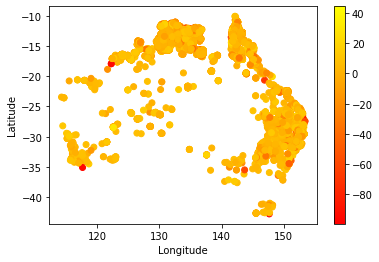

In [ ]:
plt.scatter(Xtest['longitude'], Xtest['latitude'], c=np.array(ytest)-y_pred, cmap='autumn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

# Neural Net

Model Creation

In [ ]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):

    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=Xtrain.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [ ]:
model = create_model(lyrs=[8], dr=.05)
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 8)                 112       
                                                                 
 dropout_19 (Dropout)        (None, 8)                 0         
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


Training and Testing Model

In [ ]:
print(ytrain)
print(ytest)

8661      35
6559     100
2114      44
4756      43
30043     36
        ... 
9558      72
2837      65
13722     64
7648      44
6391      45
Name: confidence, Length: 28808, dtype: int64
3498      79
30087    100
23953    100
8226      31
13821     65
        ... 
23261     55
11753     59
6183      79
16045     48
27905     80
Name: confidence, Length: 7203, dtype: int64


In [ ]:
ytrain_classified = pd.DataFrame(ytrain)
newcol = np.array(ytrain)
for idx in range(len(newcol)):
  if newcol[idx] > 70:
    newcol[idx] = 1
  else:
    newcol[idx] = 0
ytrain_classified['confidence'] = newcol

ytest_classified = pd.DataFrame(ytest)
newcol = np.array(ytest)
for idx in range(len(newcol)):
  if newcol[idx] > 70:
    newcol[idx] = 1
  else:
    newcol[idx] = 0
ytest_classified['confidence'] = newcol

training = model.fit(Xtrain, ytrain_classified, epochs=30, batch_size=64, validation_data=(Xtest, ytest_classified), verbose=1)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

Epoch 1/30
451/451 [==============================] - 2s 3ms/step - loss: 70.1081 - accuracy: 0.6079 - val_loss: 1.6729 - val_accuracy: 0.7187
Epoch 2/30
451/451 [==============================] - 1s 3ms/step - loss: 34.2343 - accuracy: 0.6754 - val_loss: 1.6015 - val_accuracy: 0.7555
Epoch 3/30
451/451 [==============================] - 3s 6ms/step - loss: 22.3882 - accuracy: 0.7058 - val_loss: 1.2961 - val_accuracy: 0.7773
Epoch 4/30
451/451 [==============================] - 1s 2ms/step - loss: 12.3948 - accuracy: 0.7333 - val_loss: 1.3830 - val_accuracy: 0.7654
Epoch 5/30
451/451 [==============================] - 1s 2ms/step - loss: 7.1416 - accuracy: 0.7417 - val_loss: 0.9494 - val_accuracy: 0.7952
Epoch 6/30
451/451 [==============================] - 1s 2ms/step - loss: 2.5197 - accuracy: 0.7499 - val_loss: 0.8377 - val_accuracy: 0.7961
Epoch 7/30
451/451 [==============================] - 1s 3ms/step - loss: 1.0960 - accuracy: 0.7670 - val_loss: 0.8006 - val_accuracy: 0.7800
Ep

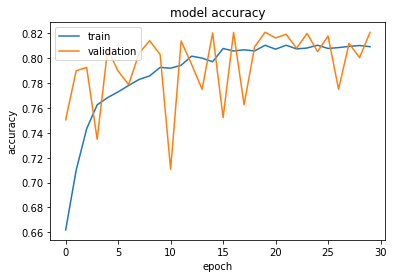

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Let's perform the same error visualizations that we had from the Random Forest Regressor.

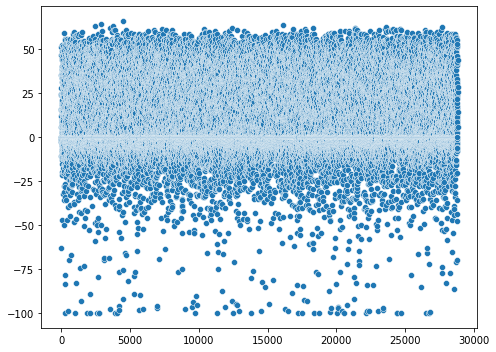

In [ ]:
# plot error for Xtrain
nnpredict = np.ndarray.flatten(model.predict(Xtrain))*100
fig, axs = plt.subplots(1, 1, figsize =(7, 5), tight_layout = True)
sns.scatterplot(x=np.arange(len(Xtrain)), y=(np.array(ytrain)-np.array(nnpredict)))

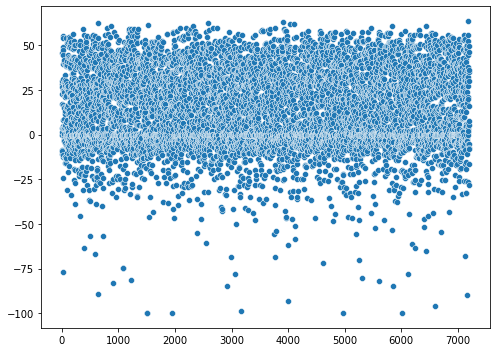

In [ ]:
# plot error for Xtest
predictions = np.ndarray.flatten(model.predict(Xtest))*100
fig, axs = plt.subplots(1, 1, figsize =(7, 5), tight_layout = True)
sns.scatterplot(x=np.arange(len(Xtest)), y=(np.array(ytest)-predictions))

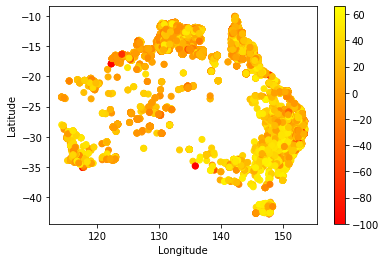

In [ ]:
plt.scatter(Xtrain['longitude'], Xtrain['latitude'], c=np.array(ytrain)-nnpredict, cmap='autumn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

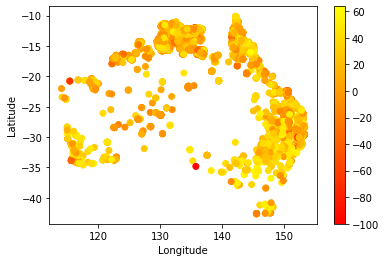

In [ ]:
plt.scatter(Xtest['longitude'], Xtest['latitude'], c=np.array(ytest)-predictions, cmap='autumn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

# Predicting From Input Data
Try out our trained models using your own input data here! 

In [ ]:
# input data from user
lat = input('Enter the latitude (ex: 3.45): ')
lon = input('Enter the longitude (ex: 1.23): ')
bright = input('Enter the brightness (ex: 111.3): ')
scan = input('Enter the scan (ex: 3.1): ')
track = input('Enter the track (ex: 1.7): ')
acqdate = input('Enter the date this information was acquired (ex: 2022-04-05): ')
acqtime = input('Enter the the time this information was acquired (ex: 33): ')
sat = input('Enter the satellite (Terra or Aqua): ')
inst = input('Enter the instrument (ex: MODIS): ')
version = input('Enter the version (ex: 6.3): ')
brightt31 = input('Enter bright_t31 (ex: 297.3): ')
frp = input('Enter the frp (ex: 6.6): ')
daynight = input('Enter the time of day (D for Day or N for Night): ')
typ = input('Enter the type (ex: 0): ')

Enter the latitude (ex: 3.45): 3.45
Enter the longitude (ex: 1.23): 1.23
Enter the brightness (ex: 111.3): 111.3
Enter the scan (ex: 3.1): 3.1
Enter the track (ex: 1.7): 2
Enter the date this information was acquired (ex: 2022-04-05): 2022-04-05
Enter the the time this information was acquired (ex: 33): 33
Enter the satellite (Terra or Aqua): Terra
Enter the instrument (ex: MODIS): MODIS
Enter the version (ex: 6.3): 6.4
Enter bright_t31 (ex: 297.3): 300
Enter the frp (ex: 6.6): 6.6
Enter the time of day (D for Day or N for Night): D
Enter the type (ex: 0): 0


In [ ]:
# processing data
lst = [[lat], [lon], [bright], [float(scan)], [track], [acqdate], [acqtime], [sat], [inst], [version], [brightt31], [frp], [daynight], [typ]]
datapoint = pd.DataFrame(np.transpose(np.array(lst)))
datapoint.columns = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'version', 'bright_t31', 'frp', 'daynight', 'type']

# consolidate and process data
datapoint = datapoint.drop(['instrument'], axis = 1)
datapoint = datapoint.drop(['version'], axis = 1)
datapoint = datapoint.drop(['track'], axis = 1)
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}
datapoint['daynight'] = datapoint['daynight'].map(daynight_map)
datapoint['satellite'] = datapoint['satellite'].map(satellite_map)
types = pd.get_dummies(datapoint['type'])
datapoint = pd.concat([datapoint, types], axis=1)
datapoint = datapoint.drop(['type'], axis = 1)

# add in unused columns
if '0' in datapoint.columns:
  datapoint['2'] = [0]
  datapoint['3'] = [0]
elif '2' in datapoint.columns:
  datapoint['0'] = [0]
  datapoint['3'] = [0]
elif '3' in datapoint.columns:
  datapoint['0'] = [0]
  datapoint['2'] = [0]
datapoint = datapoint.rename(columns={'0': 'type_0', '2': 'type_2', '3': 'type_3'})

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
datapoint['latitude'] = pd.to_numeric(datapoint['latitude'])
datapoint['longitude'] = pd.to_numeric(datapoint['longitude'])
datapoint['brightness'] = pd.to_numeric(datapoint['brightness'])
datapoint['frp'] = pd.to_numeric(datapoint['frp'])
datapoint['scan'] = pd.to_numeric(datapoint['scan'])
datapoint['scan_binned'] = pd.cut(datapoint['scan'], bins=bins, labels=labels)
datapoint['acq_date'] = pd.to_datetime(datapoint['acq_date'])
datapoint['year'] = datapoint['acq_date'].dt.year
datapoint['month'] = datapoint['acq_date'].dt.month
datapoint['day'] = datapoint['acq_date'].dt.day
mod = datapoint.drop(['acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

**Random Forest Regressor**

In [ ]:
# run model
rf_tuned = RandomForestRegressor(max_depth=35,
                                 max_features='sqrt',
                                 min_samples_leaf=1,
                                 min_samples_split=3,
                                 n_estimators=478).fit(Xtrain, ytrain)
prediction = rf_tuned.predict(mod)

# output prediction
print("Results of Random Forest Regressor:")
print("Confidence of Fire Occurrence: " + str(prediction[0]))

Results of Random Forest Regressor:
Confidence of Fire Occurrence: 25.86335259347812


**Neural Network**

In [ ]:
print(mod.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   latitude     1 non-null      float64 
 1   longitude    1 non-null      float64 
 2   brightness   1 non-null      float64 
 3   scan         1 non-null      float64 
 4   satellite    1 non-null      int64   
 5   frp          1 non-null      float64 
 6   daynight     1 non-null      int64   
 7   type_2       1 non-null      int64   
 8   type_3       1 non-null      int64   
 9   scan_binned  1 non-null      category
 10  year         1 non-null      int64   
 11  month        1 non-null      int64   
 12  day          1 non-null      int64   
dtypes: category(1), float64(5), int64(7)
memory usage: 437.0 bytes
None


In [ ]:
print(Xtest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7203 entries, 3498 to 27905
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   latitude     7203 non-null   float64 
 1   longitude    7203 non-null   float64 
 2   brightness   7203 non-null   float64 
 3   scan         7203 non-null   float64 
 4   satellite    7203 non-null   int64   
 5   frp          7203 non-null   float64 
 6   daynight     7203 non-null   int64   
 7   type_2       7203 non-null   uint8   
 8   type_3       7203 non-null   uint8   
 9   scan_binned  7203 non-null   category
 10  year         7203 non-null   int64   
 11  month        7203 non-null   int64   
 12  day          7203 non-null   int64   
dtypes: category(1), float64(5), int64(5), uint8(2)
memory usage: 640.3 KB
None


In [ ]:
# run model
prediction = model.predict(mod)[0][0]*100

# output prediction
print("\nResults of Neural Network:")
print("Confidence of Fire Occurrence: " + str(prediction))


Results of Neural Network:
Confidence of Fire Occurrence: 4.8907335429768106e-11
